# 💻 Geometriske objekter

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GMGI221-2024/forelesninger/blob/main/02_geometriske_objekter.ipynb)

All romlig vektordata kan beskrives ved å kombinere et sett med grunnleggende geometriske objekter: punkter, linjer og polygoner er de grunnleggende ingrediensene for å arbeide med romlige data.

Som regel når vi jobber med geometriske objekter i Python gjør vi det med biblioteket [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

I Python har biblioteket [shapely](https://shapely.readthedocs.io/en/stable/manual.html) blitt standardverktøyet for å arbeide med romlige objekter og for å utføre en rekke geometriske operasjoner. En grunnleggende forståelse av hvordan shapely fungerer er avgjørende for å bruke høyere nivå verktøy, som for eksempel geopandas (som vi kommer til senere) som håndterer hele datasett med geografisk informasjon (også kjent som 'lag').

Shapely, som det store flertallet av romlige programvarer, følger datamodellen satt frem i [Open Geospatial Consortium's Simple Feature Access standard](https://www.ogc.org/standards/sfa). Her bruker vi terminologien brukt av shapely, men de generelle konseptene kan anvendes også bredere.
## Datamodellen

![Spatial data model](https://autogis-site.readthedocs.io/en/latest/_images/simple-features_595x500px.svg)

`Punkt(Points)`, `Linjer(Lines)` og `Polygoner(Polygons)` er fundamentale geometriske objekter når vi jobber med romlig data i vektor formatet. I Python er [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) biblioteket som brukes for å utføre diverse geometriske operasjoner.

**Geometriske objekter består av koordinattuppler:**

Koordinattuppler er det som brukes til å definere de geometriske grunnleggende elementene punkt, linje og polygon. Koordinattuppler er vanligvis enten todimensjonale (x, y) eller tredimensjonale (x, y, z).

<div class="alert alert-info">

**Tuppler**

En [Tuppel](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) er en datastruktur i Python som består av et antall verdier separert av komma. Koordinatpar er ofte representert som tuppler. For eksempel:

```
(59.66539, 10.77604)
``` 

Tuppler tilhører sekvens-datatypene i Python. Andre sekvens-datatyper er lister og intervaller(*range*). Tuppler har mange likheter med lister og intervaller, men de brukes ofte til forskjellige formål.

Den viktigste forskjellen mellom tuppler og lister er at tuppler er uforanderlige(*immutable*), noe som betyr at innholdet i en tuppel ikke kan endres (mens lister er foranderlige; du kan for eksempel legge til og fjerne verdier fra lister).
</div>

**De vanligste geometriske objektene i python:**

-  `Point` -objektet representerer et enkelt punkt i et rom. Punkt kan være enten todimensjonale (x, y) eller tredimensjonale (x, y, z).
-  `LineString` -objektet representerer en sekvens av punkt som er koblet sammen og former en linje. En linje består dermed av en liste med minst to koordinattuppler.
-  `Polygon` -objektet representerer et fyllt område som består av en liste med misnt tre koordinattuppler som utgjør den ytre ringen (og potensielt en liste med "hull-polygoner".

**Det er også mulig å ha en samling med geometriske objekter (f.eks. et polygon med flere bestanddeler):**

-  `MultiPoint` -objektet representerer en samling med punkt og består av en liste med koordinattuppler.
-  `MultiLineString` -objektet representerer en samling med linjer og består av en liste med liste med linjelignende sekvenser.
-  `MultiPolygon` -objektet representerer en samling med polygoner som består av en lsite med polygonlignende sekvenser.

**Nyttige attributter og metoder i Shapely:**

-  Lage linjer og polygoner fra en samling med punktobjekter.
-  Regne ut areal/lengde/grenser osv. av geometrier.
-  Utføre geometriske operasjoner fra input-geometrier så som; `union`, `difference`, `distance` osv.
-  Utføre romlige spørringer mellom geometrier så som; `intersects`, `touches`, `crosses`, `within` osv.


## Punkt

Punkt lages ganske enkelt ved å gi `Point()`-objektet x- og y-koordinater:

In [2]:
# Importer nødvendige geometriske objekter fra Shapely
from shapely.geometry import Point, LineString, Polygon

# Bruk koordinater til å lage geometriske objekter av typen Point
punkt1 = Point(2.2, 4.2)
punkt2 = Point(7.2, -25.1)
punkt3 = Point(9.26, -2.456)
punkt3D = Point(9.26, -2.456, 0.57)

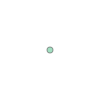

In [3]:
punkt1

Jupyter viser objektet direkte visuelt, men vi kan også få mer informasjon om definisjonen av disse objektene ved å bruke `print()`:

In [4]:
print(punkt1)
print(punkt3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


3D-punkt kan kjennes igjen ved hjelp av Z-bokstaven foran koordinatene.

Vi kan også finne ut datatypen for objektet:

In [5]:
type(punkt1)

shapely.geometry.point.Point

Her ser vi at objektet er et Shapely Point. Point-objektet er representert i et spesifikt format basert på [GEOS](https://trac.osgeo.org/geos) C++ biblioteket som er et av standardbibliotekene som brukes av ulike GIS-programmer. Det brukes blant annet som standard i [QGIS](http://www.qgis.org/en/site/). 

### Punkt-attributter og -funksjoner

Punkt og andre shapely-objekter har innebygde [attributter og funkjoner](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Med de tilgjengelige attributtene kan vi blant annet hente ut koordinatverdiene og regne ut avstanden mellom ulike punkt.

`geom_type` attributten inneholder informasjon om geometritypen til et Shapely objekt:

In [6]:
punkt1.geom_type

'Point'

Man kan trekke ut koordinatene fra et `Point` på flere måter:

`coords` attributtet inneholder blant annet informasjon om `CoordinateSequence`, en annen Shapely datatype:

In [11]:
# List ut xy-koordinattuppel
list(punkt1.coords)

[(2.2, 4.2)]

In [12]:
# Les in x- og y-koordinater separat
x = punkt1.x
y = punkt1.y

In [14]:
print(x, y)

2.2 4.2


Man kan også regne ut avstanden mellom to objekter med [distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance) metoden. I dette eksemplet er avstanden målt i et kartesisk koordinatsystem. Når man jobber med ekte GIS-data er avstanden basert på koordinatsystemet som brukes. Man bør alltid sjekke hva som er måleenheten (meter, grader, osv.) i koordinatsystemet som brukes.

La oss sjekke avstanden mellom `punkt1` og `punkt2`:

In [15]:
# Sjekk inputdata
print(punkt1)
print(punkt2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [16]:
# Regn ut avstanden mellom punkt1 og punkt 2
avstand = punkt1.distance(punkt2)

# Print ut en info-beskjed
print(f"Avstanden mellom punktene er {avstand} enheter.")

Avstanden mellom punktene er 29.723559679150142 enheter.


## LineString

Fremgangsmåten for å lage LineString-objekter er ganske lik som med Shapely punkter.

I stedet for et enkelt koordinattuppel bruker vi her en liste med Shapely punkter eller en liste med koordinattuppler:

In [17]:
# Lag en LineString fra Point-objektene våre
linje = LineString([punkt1, punkt2, punkt3])

In [18]:
# Det er også mulig å produsere sammme resultat ved å bruke koordinattupler
linje2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [19]:
# Sjekk om linjene er identiske
linje == linje2 

True

La oss se hvordan linjen vår ser ut: 

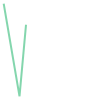

In [20]:
linje

In [21]:
print(linje)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


Som vi kan se så består `linje`-variablen vår av flere koordinatpar.

In [22]:
# Sjekk datatypen til linjeobjektet
type(linje)

shapely.geometry.linestring.LineString

In [23]:
# Sjekk geometritypen til linjeobjektet
linje.geom_type

'LineString'

### LineString-attributter og funksjoner


`LineString` -objekter har mange nyttige innebygde attributter og funksjoner. Vi kan for eksempel trekke ut koordinatene eller lenden på en linje, finne midtpunktet, lage punkter langs linjen med gitte mellomrom, eller regne ut den minste avstanden fra linjen til et punkt. Alle funksjonene er videre definert i [Shapely documentasjonen](http://toblerity.org/shapely/manual.html).

Vi kan trekke ut koordinatene fra en LineString på samme måte som med et `Point`.

In [24]:
# List ut xy-koordinattuppler
list(linje.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

Her har vi igjen en liste med koordinattuppler.

Hvis vi vil bruke de individuelle x- eller y-koordinatene i linjen, kan vi bruke `xy`-attributten: 

In [25]:
# Les in x- og y-koordinater separat
xkoordinater = list(linje.xy[0])
ykoordinater = list(linje.xy[1])

In [26]:
print(xkoordinater)
print(ykoordinater)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


Vi kan også hente ut spesifikke attributter, så som lengden av linjen og midtpunktet:

In [27]:
# Les inn lengden av linjen
linje_lengden = linje.length
print(f"Lengden på linjen vår er: {linje_lengden} enheter")

Lengden på linjen vår er: 52.46106912939557 enheter


In [28]:
# Les inn centroiden av linjen
print(linje.centroid)

POINT (6.229961354035622 -11.892411157572392)


Som vi kan se, så er midtpunktet også et Shapely Point-objekt.

## Polygon

`Polygon` -objektet følger samme logikk som `Point` og `LineString`, bare at Polygon-objektet tar en sekvens eller liste av koordinater som input.

Polygoner trenger **minst tre koordinattuppler**:

In [30]:
# Lag et polygon fra koordinater
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

La oss se hvordan polygonet vårt ser ut:

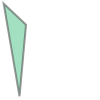

In [31]:
poly

In [32]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


In [33]:
# Datatype
type(poly)

shapely.geometry.polygon.Polygon

In [34]:
# Geometritype
poly.geom_type

'Polygon'

Vi kan også lage polygoner med hull:

In [35]:
# Definer den ytre grensen
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [36]:
# Ytre polygon
world = Polygon(shell=border)
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


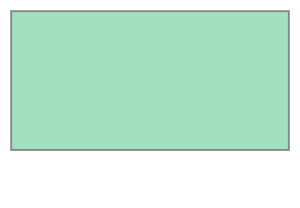

In [37]:
world

In [39]:
# La oss lage et stort hull 10 enheter fra kanten
# NB: du kan ha flere hull, so vi må gi en liste med hull-koordinater
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [40]:
# Nå kan vi lage polygonet med hullet inni
frame = Polygon(shell=border, holes=hole)
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


La oss se hva vi har:

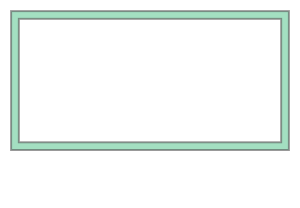

In [41]:
frame

In [42]:
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


Som vi kan se, så har polygonet nå to sett med koordinattuppler. Det første representerer det ytterste polygonet, og det andre representererer hullet inni polygonet.

### Polygon attributter og funksjoner

Vi kan også med polygoner bruke attributtene direkte fra `Polygon`-objektet, noe som kan være nyttig for ulike typer analyser. For eksempel: `area`, `centroid`, `bounding box`, `exterior`, og `exterior-length`. Den fulle listen av metoder finner du i [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#the-shapely-user-manual).

La oss se på noen av attributtene her:

In [43]:
# Print resultatene
print(f"Polygon centroid: {world.centroid}")
print(f"Polygon Area: {world.area}")
print(f"Polygon Bounding Box: {world.bounds}")
print(f"Polygon Exterior: {world.exterior}")
print(f"Polygon Exterior Length: {world.exterior.length}")

Polygon centroid: POINT (0 0)
Polygon Area: 64800.0
Polygon Bounding Box: (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length: 1080.0


Som vi kan se, er det forholdsvis enkelt å hente ut de ulike attributtene fra `Polygon`-objektet. Merk at avstandsmålene vil gi mer mening når man jobber med data i et projisert koordinatsystem.